# Schiefe Ebene
### Aufgabestellung

Ein Fahrzeug der Masse $m = 0,5~kg$ fährt eine geneigte Ebene hinab. Berechnen Sie den Weg $s$, die Geschwindigkeit $v$ und die Beschleunigung $a$, wenn der Winkel $\alpha = 40°$ und $\mu = 0.03$ betragen.

### Gegeben
- $m = 0.5~kg$
- $\alpha = 40°$
- $\mu = 0.03$ 

### Gesucht
- Beschleunigung $a$
- Weg $s$
- Geschwindigkeit $v$

### Skizze
![title](Skizzen/Skizze_geneigte_eben.png)

### Physikalischer Lösungsweg
Im Folgenden werden die Formeln zur Berechnung des Wegs $s$, der Geschwindigkeit $v$ und der Beschleunigung $a$ benötigt:\
$s = 0,5 \cdot a \cdot t^2 + v_0 \cdot t + s_0$

$v = a \cdot t + v_0$

Da die Beschleunigung unbekannt ist, ergibt sich die Berechnung von $a$ aus dem Kraftansatz:\
$\text{Kraftansatz}_{\text{Trägheit}}$ = $\sum \text{äußere Kräfte}$

Die Beschleunigung $a$ wird demnach anhand gegebener Größen wie folgt berechnet:

$a = \frac{F_H - F_R}{m} = \frac{(m \cdot g \cdot \sin \alpha) - (\mu \cdot m \cdot g \cdot \cos \alpha)}{m}$

Berechnung $a$:
- $a = \frac{(0,5 \cdot 9,81 \cdot \sin(40°)) - (0,03 \cdot 0,5 \cdot 9,81 \cdot \cos(40°))}{0,5} = \frac{3,15 - 0,11}{0,5} = 6,08~\frac{m}{s²}$

Einheitengleichung: 
- $[a] = \frac{([m] \cdot [g] \cdot \sin \alpha) - ([\mu] \cdot [m] \cdot [g] \cdot \cos \alpha)}{[m]} = \frac{kg \cdot m  - kg \cdot m}{kg \cdot s²} = \frac{m}{s²}$



### Implemetierung in Python
Als ersten werden die benötigten Bibliotheken importiert: 

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib import cm
import pandas as pd

Im Folgenden soll dargestellt werden, wie man einen Vektor mit unterschiedlichen Schritten erstellt. Als Beispiel sollen hier 10 Sekunden in 0,5 Sekundenschritten simuliert werden: 

In [2]:
# Erstellen des Vektors
time = np.arange(0, 10.5, 0.5)
# Ausgabe des Vektors
print(time)

[ 0.   0.5  1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5  6.   6.5
  7.   7.5  8.   8.5  9.   9.5 10. ]


Die folgenden Funktionen berechnen den zurückgelegten Weg $s$, die Beschleunigung $a$ bzw. die Geschwindigkeit $v$ in Abhängigkeit der Zeit $t$. 

In [3]:
# Funktion zur Berechnung von a
def calculate_acceleration(m, alpha, mueh):
    g = 9.80665 # m/s^2
    FG = m*g
    FH = FG*math.sin(math.radians(alpha))
    FN = FG*math.cos(math.radians(alpha))
    FR = mueh * FN

    a = (FH - FR)/m
    return a

# Funktion zur Berechnung von s
def calculate_distance(a, s0, v0, t):
    s = 0.5 * a * ((t)**2) + (v0 * (t)) + s0
    return s

# Funktion zur Berechnung von v
def calculate_velocity(a, v0):
    v = a * (t) + v0
    return v


### Funktionsaufrufe
Im Folgenden werden Funktionsaufrufe erklärt. Die oben definierten Funktionen z.B. zur Berechnung der Beschleunigung können nun dafür verwendet werden, um schnell und einfach diese Beschleunigung zu berechnen. Dafür wird die Funktion mit dem Namen *calculate_acceleration* aufgerufen und die Parameter in der Klammer ($m, \alpha, \mu$) übergeben. Ohne diese gegebenen Parameter kann $a$ nicht berechnet werden, es ist also essentiell für die Funktion. Sie gibt die Beschleunigung als Wert zurück, dieser kann sowohl in einer Variablen gespeichert oder direkt in der Konsole ausgegeben werden. 

In [4]:
# Variablen definieren und Variablenwerte setzen
m = 0.5 # Masse [kg]
alpha = 40 # degree
mueh = 0.03

# Berechnung der Beschleunigung a für die definierten Variablen
a = calculate_acceleration(m, alpha, mueh)
print(f"Die Beschleunigung beträgt {round(a, 2)} Meter pro Sekunde.")

Die Beschleunigung beträgt 6.08 Meter pro Sekunde.


### Graphische Darstellung der physikalischen Lösung

In [5]:
# Initialisieren einer Liste
messwerte = []

# hier werden die Startbedingungen gesetzt
# wenn s0 & v0 = 0 sind, ist die Masse in Ruhe
s0 = 0
v0 = 0

for t in time: 
    a = calculate_acceleration(m, alpha, mueh)
    v = calculate_velocity(a, v0)
    s = calculate_distance(a, s0, v0, t)
    messwerte.append([t, a, v, s])

# Übertragen der Liste in ein Dataframe
table = pd.DataFrame(messwerte, columns=['t', 'a', 'v', 's'])
table.head()

,t,a,v,s
0,0.0,6.078223,0.000000,0.000000
1,0.5,6.078223,3.039112,0.759778
2,1.0,6.078223,6.078223,3.039112
3,1.5,6.078223,9.117335,6.838001
4,2.0,6.078223,12.156446,12.156446


Nun sollen der zurückgelegte Weg, die Geschwindigkeit und die Beschleunigung des Körpers visualisiert werden.

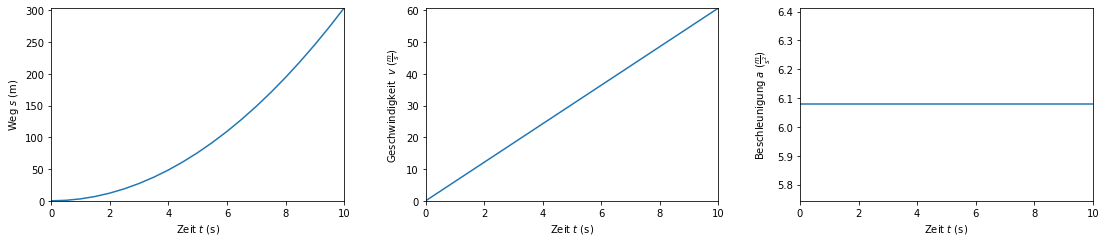

In [6]:
# Definieren der Größe und des Aussehens des Plots
plt.style.use({'figure.facecolor':'white'})
fig, axs = plt.subplots(1, 3, figsize=(16, 4), sharey=False)
# 1. Plot (links): Auftragen der Wegstrecken
axs[0].plot(time, table['s'])
axs[0].set_xlim([0, max(table['t'])])
axs[0].set_ylim([0,max(table['s'])])
# Achsenbeschriftungen hinzufügen
axs[0].set_ylabel("Weg $\mathit{s}$ (m)")
axs[0].set_xlabel("Zeit $\mathit{t}$ (s)")
# 2. Plot (Mitte): Auftragen der Geschwindigkeiten
axs[1].plot(time, table['v'])
axs[1].set_xlim([0,max(table['t'])])
axs[1].set_ylim([0,max(table['v'])])
# Achsenbeschriftungen hinzufügen
axs[1].set_ylabel("Geschwindigkeit  $\mathit{v}$ " + r'($\frac{m}{s}$)') 
axs[1].set_xlabel("Zeit $\mathit{t}$ (s)")
# 3. Plot (rechts): Auftragen der Beschleunigung
axs[2].plot(time, table['a'])
axs[2].set_xlim([min(table['t']),max(table['t'])])
# Achsenbeschriftungen hinzufügen
axs[2].set_ylabel("Beschleunigung $\mathit{a}$ " + r'($\frac{m}{s^2}$)')
axs[2].set_xlabel("Zeit $\mathit{t}$ (s)")
fig.tight_layout(pad=3.0)

### Graphische Darstellung unter Variation der Anfangsbedingung
Jetzt können in einer Schleife für verschiedene $\alpha$-Winkel die Beschleunigungen $a$, die Geschwindigkeiten $v$ und Wegstrecken $s$ in Abhängigkeit von der Zeit $t$ bestimmt werden: 

In [7]:
# Definition verschiedener alpha-Winkel
alpha_vector = np.arange(40, 90, 10)
# hier werden die Startbedingungen gesetzt
s0 = 0
v0 = 0

# Wir definieren wieder eine Messwerttabelle
messwerte2 = []

# Jetzt wird durch die Iteration des alpha_vector für alle alpha_i die Geschwindigkeit, der Weg und die Beschleunigung berechnet.
for alpha_i in alpha_vector:
    for t in time: 
        a = calculate_acceleration(m, alpha_i, mueh)
        v = calculate_velocity(a, v0)
        s = calculate_distance(a, s0, v0, t)
        messwerte2.append([t, a, v, s, alpha_i])

# Übertragen der Liste in ein Dataframe
table2 = pd.DataFrame(messwerte2, columns=['t', 'a', 'v', 's', 'alpha_i'])
table2

,t,a,v,s,alpha_i
0,0.0,6.078223,0.000000,0.000000,40
1,0.5,6.078223,3.039112,0.759778,40
2,1.0,6.078223,6.078223,3.039112,40
3,1.5,6.078223,9.117335,6.838001,40
4,2.0,6.078223,12.156446,12.156446,40
...,...,...,...,...,...
100,8.0,9.606578,76.852622,307.410488,80
101,8.5,9.606578,81.655911,347.037621,80
102,9.0,9.606578,86.459200,389.066399,80
103,9.5,9.606578,91.262489,433.496821,80


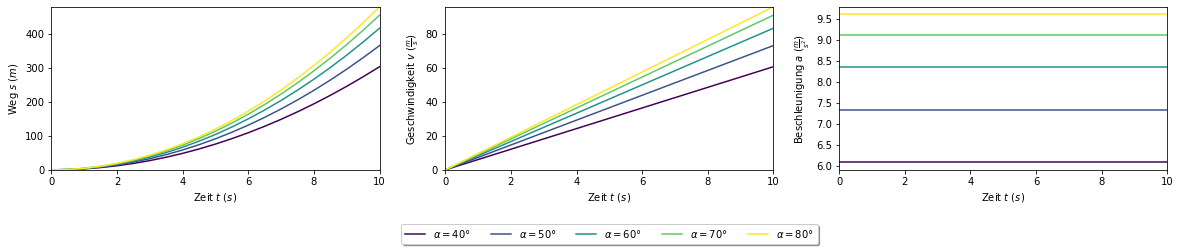

In [8]:
groups = table2.groupby('alpha_i') # Für die Visualsierung werden nun die verschiedenen Messungen bei unterschiedlichen alpha gruppiert
# Definition einer Farbpalette 
col_pal = plt.get_cmap('viridis', len(alpha_vector))
# Initialisieren einer Zählvariable
i = -1


fig, axs = plt.subplots(1, 3, figsize=(20,3))
# Iteration der alpha Gruppen und anschließende Visualsierung
for name, group in groups:
    i = i+1
    axs[0].plot(group['t'], group['s'], linestyle="-", color=col_pal(i))
    axs[1].plot(group['t'], group['v'], linestyle="-", color=col_pal(i), label = r"$\alpha = $" + f"{name}°")
    axs[2].plot(group['t'], group['a'], linestyle="-", color=col_pal(i))
    

    
axs[0].set_ylabel(r"Weg $\mathit{s}$ ($m$)")
axs[0].set_xlabel(r"Zeit $\mathit{t}$ (${s}$)") 
axs[0].set_xlim([0, max(group['t'])])
axs[0].set_ylim([0,max(group['s'])])

axs[1].set_ylabel(r"Geschwindigkeit $\mathit{v}$ ($\frac{m}{s}$)")
axs[1].set_xlabel(r"Zeit $\mathit{t}$ (${s}$)")
axs[1].set_xlim([0,max(group['t'])])
axs[1].set_ylim([0,max(group['v'])])

axs[2].set_ylabel(r"Beschleunigung $\mathit{a}$ ($\frac{m}{s^2}$)")
axs[2].set_xlabel(r"Zeit $\mathit{t}$ (${s}$)")
axs[2].set_xlim([min(group['t']),max(group['t'])])


axs[1].legend(loc='upper center', bbox_to_anchor=(0.5, -0.3),
          fancybox=True, shadow=True, ncol=len(alpha_vector))
plt.show()


Nun soll Wegänderungen $s$ über die Zeit $t$ mit verschiedenen Startgeschwindigkeiten $v_0$ visualisiert werden.

In [9]:
# Erstellen des v0-Vektors
v0_vector = np.arange(0, 54, 4)
# Ausgabe des Vektors
print(v0_vector)

[ 0  4  8 12 16 20 24 28 32 36 40 44 48 52]


In [10]:
# Definition eines Dictionary
data = []
for v0 in v0_vector:
    for t in time:
        s = calculate_distance(calculate_acceleration(m, alpha, mueh), 0, v0, t)
        data.append([t, s, v0])


# Erstellen eines Dataframes
df = pd.DataFrame(data, columns=["t", "s", "v0"])
# Ausgabe von df
df.head()

,t,s,v0
0,0.0,0.000000,0
1,0.5,0.759778,0
2,1.0,3.039112,0
3,1.5,6.838001,0
4,2.0,12.156446,0


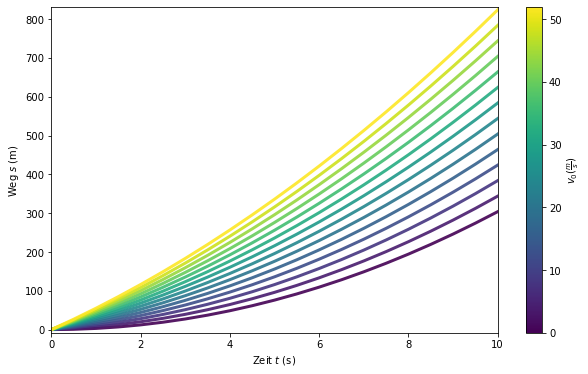

In [11]:
grouped_data = df.groupby("v0")
# Definieren der Größe und des Aussehens des Plots
plt.figure(num=None, figsize=(10, 6), facecolor='w', edgecolor='k')
# Anlegen einer color palette 
# Definition der Farbpalette 
normalize = mcolors.Normalize(vmin=v0_vector.min(), vmax=v0_vector.max())
colormap = cm.viridis

# multiple line plot
iterator=0
for name, group in grouped_data:
    plt.plot(group['t'], group['s'], marker='', color=colormap(normalize(name)), linewidth=3, alpha=0.9, label="$\mathit{v_0}}$ =" + f" {name}" + r' $\frac{m}{s}$')
    iterator+=1

# Legende hinzufügen
#plt.legend(loc=2, ncol=2)
 
# Achsenbeschriftungen hinzufügen
plt.xlabel("Zeit $\mathit{t}$ (s)")
plt.ylabel("Weg $\mathit{s}$ (m)")
plt.margins(0,0.01)

# Legende
scalarmappaple = cm.ScalarMappable(norm=normalize, cmap=colormap)
scalarmappaple.set_array(v0_vector)
cbar = plt.colorbar(scalarmappaple)
cbar.set_label(r'$v_0 (\frac{m}{s})$')